<a href="https://colab.research.google.com/github/NaithaniAR/NYC-Taxi-Trip-Time-Prediction---Capstone-Project.ipynb/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing  libraries

 Importing important libraries for analysis and visualisation 

In [ ]:
pip install matplotlib==3.1.3


ERROR: Operation cancelled by user


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.formula.api as sm
%matplotlib inline
import calendar


Libraries for machine learning 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from xgboost import XGBRegressor


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/df.csv',parse_dates=['pickup_datetime','dropoff_datetime'])

#To suppres scientific notation.
pd.options.display.float_format = '{:.2f}'.format 

pd.set_option('display.max_columns', None)

# **Data Exploration**
We will explore the data and modify dataset as per the our requirment for the further analysis of the problem.

In [ ]:
# Checking top 5 records in dataframe

df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,1.22
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663,1.33
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124,2.10
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429,0.30
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435,0.20


In [ ]:
# Checking bottom 5 records in dataframe

df.tail()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance
1354578,1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,N,778,0.89
1354579,1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,N,655,2.33
1354580,1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,N,764,3.35
1354581,1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,N,373,0.54
1354582,1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.98,40.78,-73.97,40.79,N,198,0.50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354583 entries, 0 to 1354582
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Unnamed: 0          1354583 non-null  int64         
 1   id                  1354583 non-null  object        
 2   vendor_id           1354583 non-null  int64         
 3   pickup_datetime     1354583 non-null  datetime64[ns]
 4   dropoff_datetime    1354583 non-null  datetime64[ns]
 5   passenger_count     1354583 non-null  int64         
 6   pickup_longitude    1354583 non-null  float64       
 7   pickup_latitude     1354583 non-null  float64       
 8   dropoff_longitude   1354583 non-null  float64       
 9   dropoff_latitude    1354583 non-null  float64       
 10  store_and_fwd_flag  1354583 non-null  object        
 11  trip_duration       1354583 non-null  int64         
 12  Distance            1354583 non-null  float64       
dtypes: datetime6

In [ ]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
print("The shape of our dataset is :",(df.shape))

The shape of our dataset is : (1354583, 12)


In [ ]:
#Check count of unique id's in the dataset

print("There are %d unique id's in our dataset, which is equal to the number of records"%(df.id.nunique()))

There are 1354583 unique id's in our dataset, which is equal to the number of records


In [ ]:
#Check for NaN values

df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
Distance              0
dtype: int64

# Exploratory Data Analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


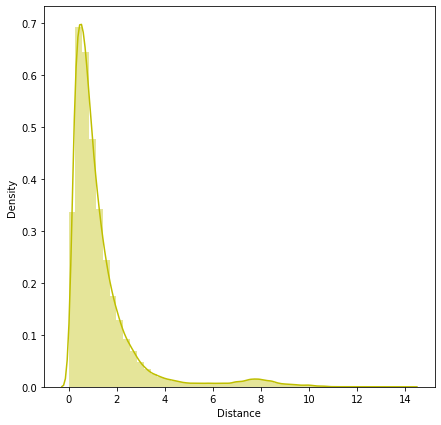

In [ ]:
# Dependent variable 'Price'

plt.figure(figsize=(7,7))
sns.distplot(df['Distance'],color="y")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


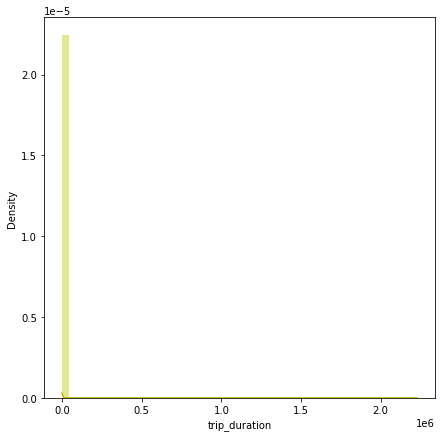

In [ ]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(df['trip_duration'],color="y")

Our data is positively skewed, we will do log transformation 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


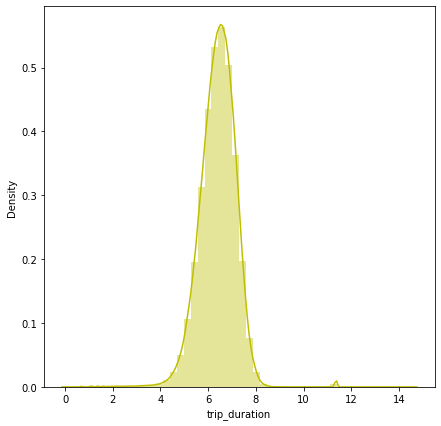

In [ ]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(np.log(df['trip_duration']),color="y")

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'Distance'],
      dtype='object')

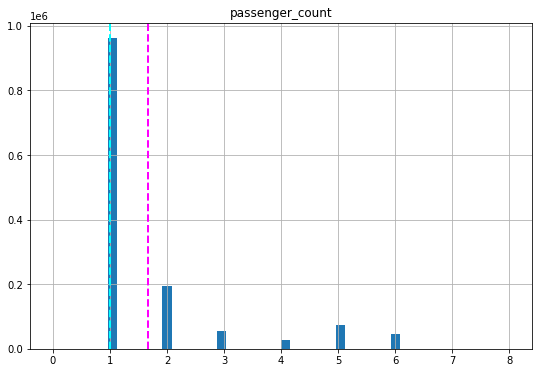

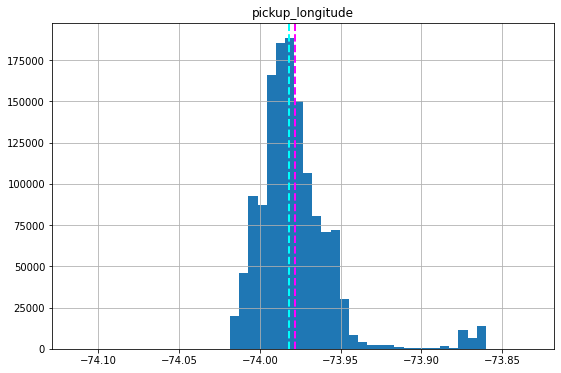

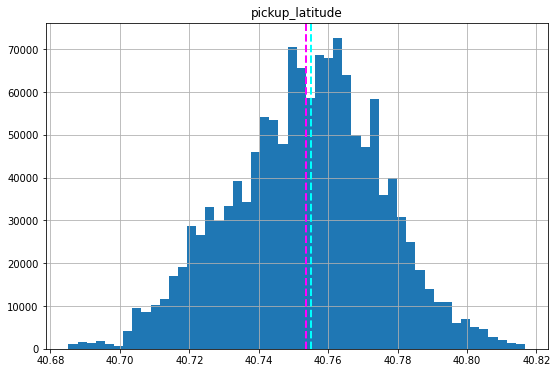

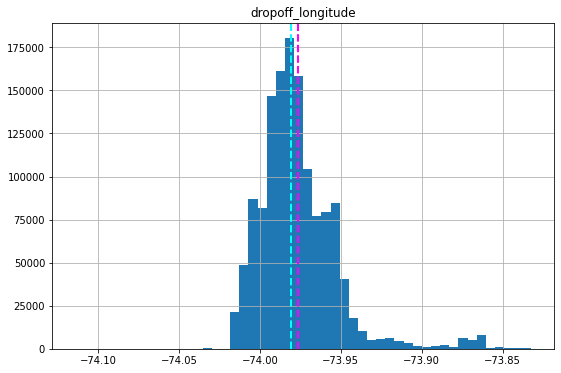

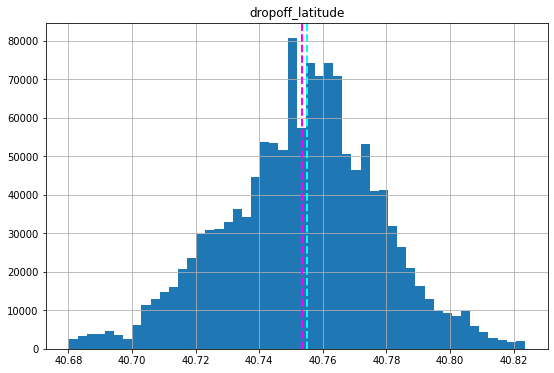

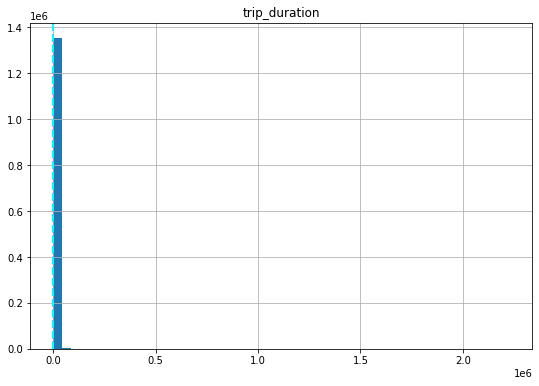

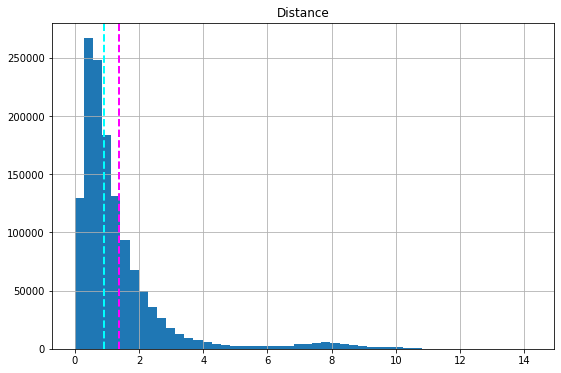

In [ ]:
#@title Default title text
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

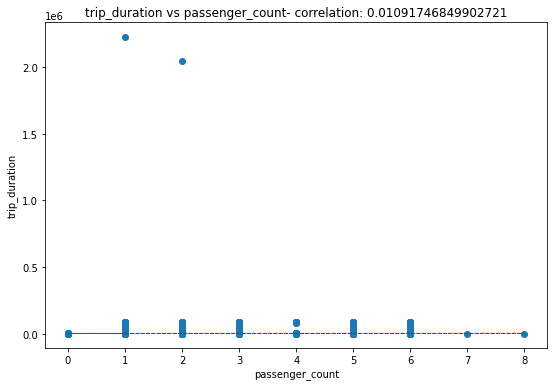

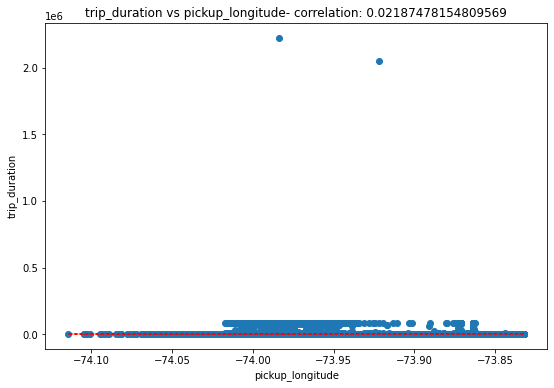

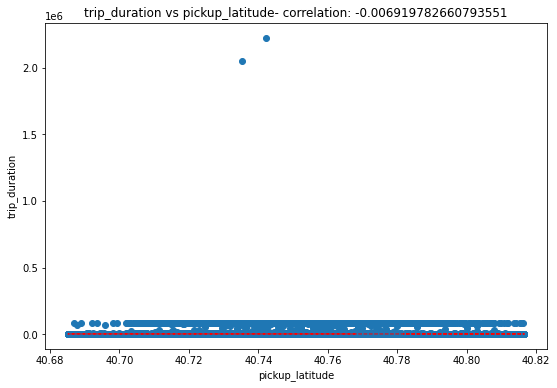

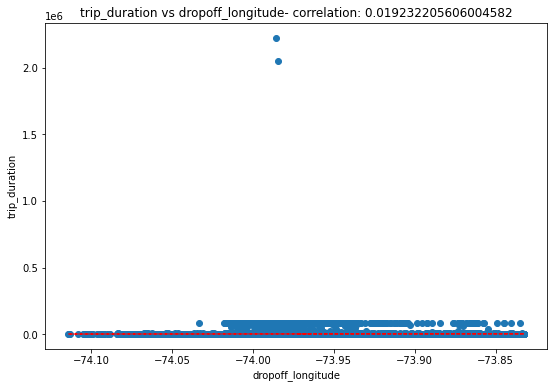

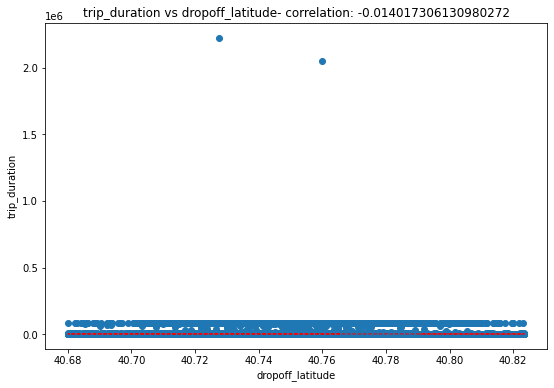

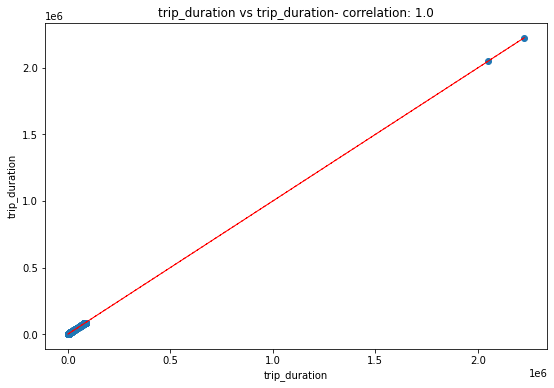

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('trip_duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'Distance'],
      dtype='object')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
 calc_vif(df[[i for i in df.describe().columns if i not in ['haversine_distance','id','vendor_id','dropoff_month']]])

,variables,VIF
0,passenger_count,2.60
1,pickup_longitude,8310642.60
2,pickup_latitude,4970747.03
3,dropoff_longitude,8954071.97
4,dropoff_latitude,4195261.46
5,trip_duration,1.05
6,Distance,1.87


# Feature Engineering

### **Distance:**

[**Haversine Distance :**](https://pypi.org/project/haversine/)
The majority of geospatial analysts agree that this is the appropriate distance to use for Earth distances and is argued to be more accurate over longer distances compared to Euclidean distance.

Performance is faster in computing compared to other great circle distance formulas such as [Vincenty Formula](https://pypi.org/project/vincenty/)


Manhattan Distance

**The Manhattan Distance :** *is a measure of the distance between two points that take into account the perpendicular layout of the map. It is called Manhattan distance because Manhattan is known for its grid or block layout where streets intersect at right angles*. [For more info](https://towardsdatascience.com/spatial-distance-and-machine-learning-2cab72fc6284)

In [ ]:
#we will use Haversine distance to calculate great circle distance between two points and manhattan distance to calculate block distance 

def haversine_distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

  
#manhattan distance to calculate block distance 

def manhattan_distance(lat1, lng1, lat2, lng2):
    # km 
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b
  

In [ ]:
#Adding column "haversine_distance" in our df 

df["haversine_distance"] = haversine_distance(df["pickup_latitude"], df["pickup_longitude"],df["dropoff_latitude"], df["dropoff_longitude"])


#Adding column "manhattan_distance" in our df 

df["manhattan_distance"] = manhattan_distance(df["pickup_latitude"], df["pickup_longitude"], df["dropoff_latitude"], df["dropoff_longitude"])

In [ ]:
# Running a check with Data obtained from google. 

df.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance,haversine_distance,manhattan_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,1.22,0.93,1.08


We observe the Minimum **driving distance** for our first observation according to google is [1.5 miles](https://www.google.com/maps/dir/'40.77,-73.98'/'40.77,-73.96'/@40.7689841,-73.9738618,15z/data=!4m13!4m12!1m5!1m1!1s0x0:0xb0aac0a0d6383216!2m2!1d-73.98!2d40.77!1m5!1m1!1s0x0:0x778ea6368195c8d2!2m2!1d-73.96!2d40.77), when compared to distance that we [calculated earlier](https://github.com/NaithaniAR/NYC-Taxi-Trip-Time-Prediction---Capstone-Project.ipynb/blob/main/NYC_Taxi_Trip_Driving_Distance.ipynb) with haversine distance and manhatten distance, we observe that osmnx is the most accurate.  

### **Pickup Datetime &  Dropoff Datetime**


*   Date and Time when the meter was disengaged and engaged
*   Extracing Date Time Month Day and Year for further analysis 


In [ ]:
#Date

df['pickup_date']=df['pickup_datetime'].dt.date
df['dropoff_date']=df['dropoff_datetime'].dt.date


#Day

df['pickup_weekday']=df['pickup_datetime'].dt.day_name().astype('category')
df['dropoff_weekday']=df['dropoff_datetime'].dt.day_name().astype('category')


#Month

df['pickup_month']=df['pickup_datetime'].dt.month.astype(float)
df['dropoff_month']=df['dropoff_datetime'].dt.month.astype(float)


# Time

df['Pick_Up_time'] = df['pickup_datetime'].dt.time
df['Drop_off_time'] = df['dropoff_datetime'].dt.time


#Year

df['pickup_Year']=df['pickup_datetime'].dt.year.astype(float)
df['dropoff_Year']=df['dropoff_datetime'].dt.year.astype(float)


#Hour

df['pickup_datetime_hour'] = df.pickup_datetime.dt.hour.astype(float)
df['dropoff_datetime_hour'] =df.dropoff_datetime.dt.hour.astype(float)


# Univariate Analysis

### **ID**
*A unique identifier for each trip*

In [ ]:

df['id'].describe()

count       1354583
unique      1354583
top       id2875421
freq              1
Name: id, dtype: object

There are no duplicate values in 'id', with  1354583 unique values 

### Distance 

In [ ]:
#Running a describe column to compare the distance columm 

df[['Distance','haversine_distance','manhattan_distance' ]].describe()

,Distance,haversine_distance,manhattan_distance
count,1354583.00,1354583.00,1354583.00
mean,1.37,1.68,2.16
std,1.56,1.42,1.82
min,0.00,0.00,0.00
25%,0.51,0.74,0.94
50%,0.90,1.22,1.57
75%,1.58,2.11,2.72
max,14.22,11.47,15.52


In [ ]:
# Removing the potential distance outlier 

# Removing the bottom 1 perentile values as distance travelled cannot be equal to zero. 

df = df[ df['Distance'] > df['Distance'].quantile(0.01)]


df = df[(df['manhattan_distance'] < df['manhattan_distance'].quantile(0.99)) & (df['manhattan_distance'] > df['manhattan_distance'].quantile(0.01))]
 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


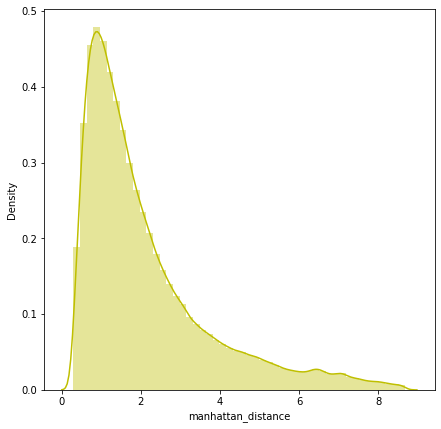

In [ ]:
#Checking for Skweness 

plt.figure(figsize=(7,7))
sns.distplot(df['manhattan_distance'],color="y")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


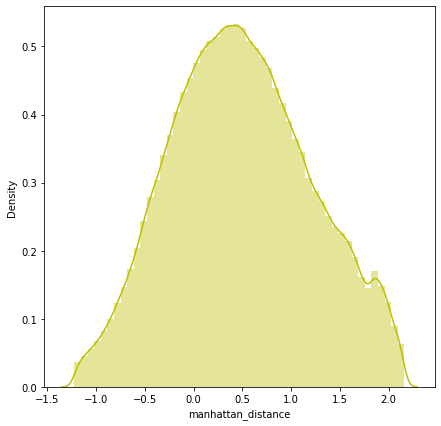

In [ ]:
#Log Transforamtion 

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['manhattan_distance']),color="y")

Here we will impliment log transform. 

### Vendor id

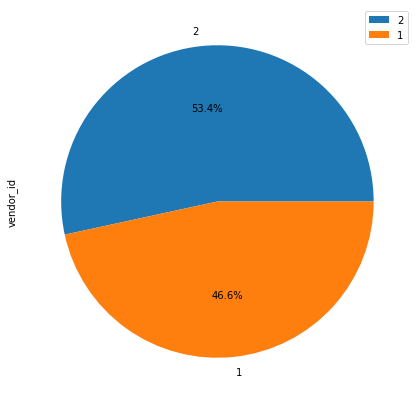

In [ ]:
# Pie chart for vendor ID distribution 

df['vendor_id'].value_counts().plot.pie(figsize = (7,9), autopct='%1.1f%%')
plt.legend()


We can observe that there are approximately similar percentage on both side 

### **Passenger Count**
The number of passengers in the vehicle (driver entered value)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


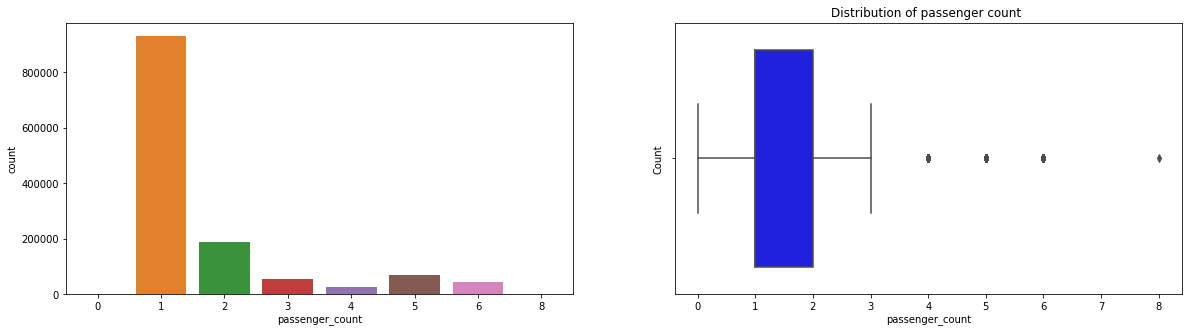

In [ ]:
#Plotting Sub Plot 

fig, axes = plt.subplots(1, 2,figsize=(20,5))

#Plotting bar graph 

sns.countplot(df['passenger_count'],ax=axes[0])
plt.title('Distribution of passenger count ')
plt.xlabel('Passenger')
plt.ylabel('Count')
#Plotting Box Plot

sns.boxplot(df['passenger_count'],color='blue',ax=axes[1])

According to [ Driver Rule 54-15(g)](https://www1.nyc.gov/assets/tlc/downloads/pdf/rule_book_current_chapter_54.pdf) of 'NYC Taxi and Limousine Commission' ,  maximum permissible number of passengers in a taxi is 6. Hence we will drop values which are greater than 6. 

There are some values that are represented by 0, we will drop these values to. because this is clearly a mistake and no further data is available for drawing any conclusions. 

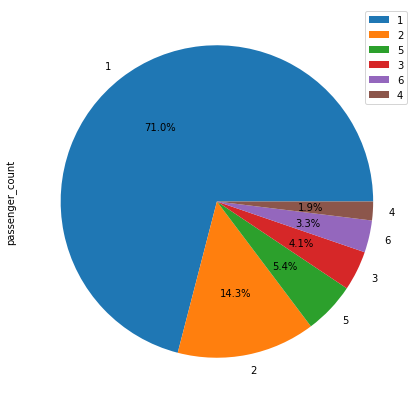

In [ ]:
#Dropping Passenger Count 

df= df[(df['passenger_count']>0) & (df['passenger_count']<=6)]

#Plotting pie chart 

df['passenger_count'].value_counts().plot.pie(figsize = (7,9), autopct='%1.1f%%')
plt.legend()

### Trip Duration


Text(0.5, 1.0, 'Duration Distribution')

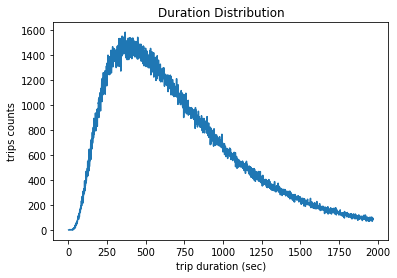

In [ ]:
# trip duration overall distribution 
# taking the 97% Quantile values to remove outliers 

tripduration = df[df.trip_duration < df.trip_duration.quantile(.97)]


#Plotting Trip duration VS Trip_duration.counts

tripduration.groupby('trip_duration').count()['id'].plot()
plt.xlabel('trip duration (sec)')
plt.ylabel('trips counts')
plt.title('Duration Distribution')

In [ ]:
df['trip_duration'].sort_values().tail()

700182      86379
55711       86387
68649       86390
632292    2049578
858347    2227612
Name: trip_duration, dtype: int64


*   Most trips finished within 6-17 minute (400-1000 sec)
*  Some trips take too long/too fast are obvious wrong, maybe because of tech/maunal operation issues, should filter them in following process





In [ ]:
# Trip duration should less then 12 hours and greater than 30 seconds normally
      
df = df[(df['trip_duration']  < 12*3600) & (df['trip_duration'] > 30)]


# Remove potential  trip duration outlier

df = df[(df['trip_duration'] < df['trip_duration'].quantile(0.99)) & (df['trip_duration'] > df['trip_duration'].quantile(0.01))]

### Speed

In [ ]:
#Calculate Speed 
# Distance obtained is in Miles/hr

df['Avg_speed'] = 3600 * df['Distance'] / df['trip_duration']

The speed limit set in [USA](https://en.wikipedia.org/wiki/Speed_limits_in_the_United_States) for fastest moterable road is set at 85 miles per hour, and avg walking speed is considered to be 3mph. so limiting our data to this and adding a 50 % margin for overspeeding and traffic jams.

In [ ]:
# Setting speed in a logical range 

df = df[(df['Avg_speed']  < 130) & (df['Avg_speed'] > 1.0)]


# Removing outliers

df = df[(df['Avg_speed'] < df['Avg_speed'].quantile(0.999)) & (df['Avg_speed'] > df['Avg_speed'].quantile(0.001))]

### **store_and_fwd_flag**
 This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

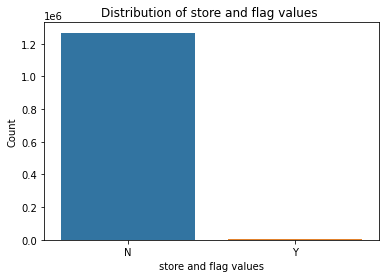

In [ ]:
#Plotting bar graph 


sns.countplot(df['store_and_fwd_flag'])
plt.title('Distribution of store and flag values ')
plt.xlabel('store and flag values')
plt.ylabel('Count')


# Bivariate analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273780 entries, 0 to 1354582
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1273780 non-null  int64         
 1   id                     1273780 non-null  object        
 2   vendor_id              1273780 non-null  int64         
 3   pickup_datetime        1273780 non-null  datetime64[ns]
 4   dropoff_datetime       1273780 non-null  datetime64[ns]
 5   passenger_count        1273780 non-null  int64         
 6   pickup_longitude       1273780 non-null  float64       
 7   pickup_latitude        1273780 non-null  float64       
 8   dropoff_longitude      1273780 non-null  float64       
 9   dropoff_latitude       1273780 non-null  float64       
 10  store_and_fwd_flag     1273780 non-null  object        
 11  trip_duration          1273780 non-null  int64         
 12  Distance               12737

We have added new colums, we can use these colums to analyse our data further and perform bivariate analysis 

### Pickup date & Dropoff date

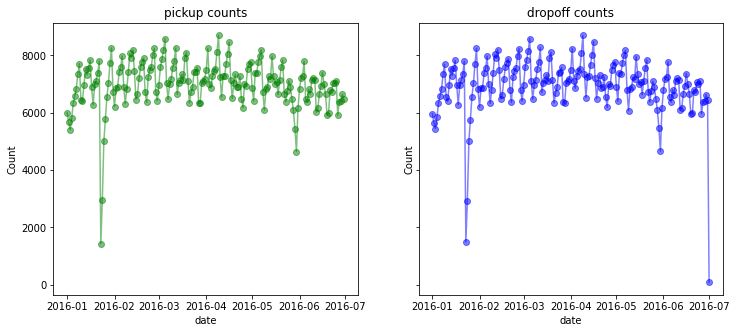

In [ ]:
#Plotting graph of Pickup and Dropoff counts wrt to dates. 

fig, ax = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(12, 5)

ax[0].plot(df.groupby('pickup_date').count()['id'], 'go-', alpha=0.5)
ax[1].plot(df.groupby('dropoff_date').count()['id'], 'bo-', alpha=0.5)

ax[0].set(xlabel='date', ylabel='Count',title="pickup counts")
ax[1].set(xlabel='date', ylabel='Count',title="dropoff counts")

plt.show()

In [ ]:
#Finding Dates with least number of pickups 

df.groupby('pickup_date').count()['id'].sort_values()

pickup_date
2016-01-23    1425
2016-01-24    2949
2016-05-30    4647
2016-01-25    5005
2016-01-03    5407
              ... 
2016-03-12    8259
2016-01-30    8261
2016-04-16    8460
2016-03-05    8583
2016-04-09    8700
Name: id, Length: 182, dtype: int64

In [ ]:
#Finding Dates with least number of dropoffs

df.groupby('dropoff_date').count()['id'].sort_values()

dropoff_date
2016-07-01      81
2016-01-23    1493
2016-01-24    2921
2016-05-30    4659
2016-01-25    5002
              ... 
2016-01-30    8249
2016-03-12    8278
2016-04-16    8485
2016-03-05    8585
2016-04-09    8695
Name: id, Length: 183, dtype: int64

We observe that daily Drop Off vary between 6000 and 1000, values on 26-07-01,2016-01-23,2016-01-24 are considerably low, hence we will drop these observations.

In [ ]:
#Dropping values from Date with abnormal values 
#Remove the 2016-01-23 data since its too less comapre others days, 
    # maybe quality is not good 


df= df[(df.pickup_date != '2016-01-23') ]
df= df[(df.dropoff_date != '2016-01-24') ]
df= df[(df.dropoff_date != '26-07-01') ]

### Passenger Count 

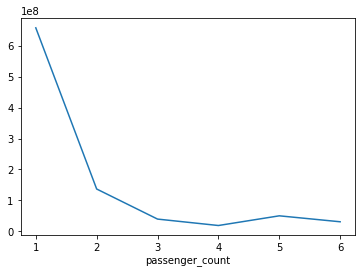

In [ ]:
#Graph B/W 

df.groupby(['passenger_count']).sum()['trip_duration'].plot()

Trip duration is not related to passenger count, hence we can convert it to one hot encoding. 

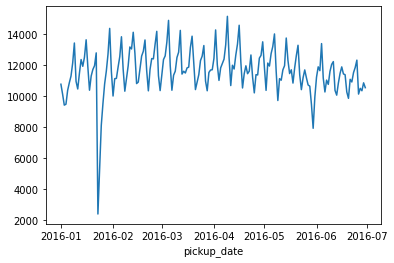

In [ ]:
df.groupby(['pickup_date']).sum()['passenger_count'].plot()


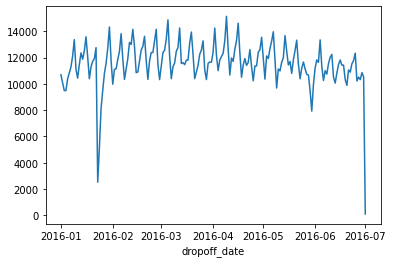

In [ ]:
df.groupby(['dropoff_date']).sum()['passenger_count'].plot()

In [ ]:
df.groupby(['dropoff_date']).sum()['passenger_count'].sort_values()

dropoff_date
2016-07-01      111
2016-01-23     2530
2016-01-24     5145
2016-05-30     7927
2016-01-25     8112
              ...  
2016-03-12    14245
2016-01-30    14318
2016-04-16    14608
2016-03-05    14858
2016-04-09    15129
Name: passenger_count, Length: 183, dtype: int64

In [ ]:
df.groupby(['pickup_date']).sum()['passenger_count'].sort_values()

pickup_date
2016-01-23     2396
2016-01-24     5183
2016-05-30     7925
2016-01-25     8111
2016-01-03     9418
              ...  
2016-04-02    14269
2016-01-30    14368
2016-04-16    14571
2016-03-05    14885
2016-04-09    15146
Name: passenger_count, Length: 182, dtype: int64



*   Passenger count is considerably less on '2016-07-01' , '2016-01-23'  




### Trip Duration VS Hour

A [pivot table](https://pbpython.com/pandas-pivot-table-explained.html) is a table of grouped values that aggregates the individual items of a more extensive table

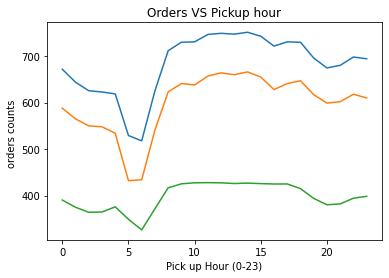

In [ ]:
#tripduration = df_train_[df_train_.trip_duration < df_train_.trip_duration.quantile(.97)]  {As Calculated in section  }


pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.mean)['trip_duration'].plot(label='mean')
pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.median)['trip_duration'].plot(label='median')
pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.std)['trip_duration'].plot(label='std')

#plt.legend(loc=0)
plt.xlabel('Pick up Hour (0-23)')
plt.ylabel('orders counts ')
plt.title('Orders VS Pickup hour')
plt.show()

### store_and_fwd_flag VS  Trip duration 

Text(0, 0.5, 'Trip Duration')

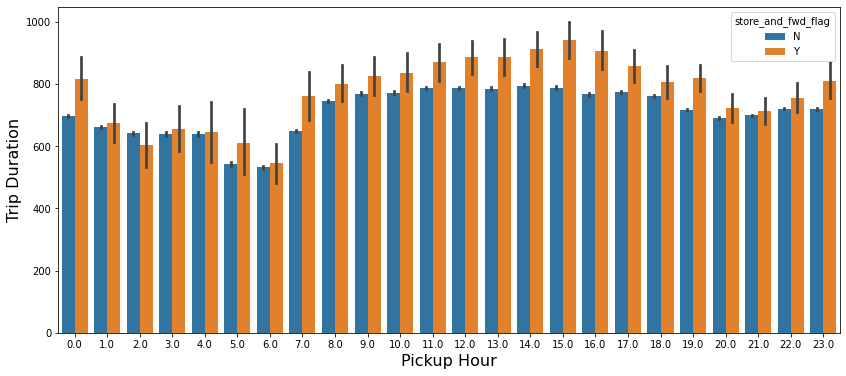

In [ ]:
# Plottong  store_and_fwd_flag VS trip_duration


plt.figure(figsize=(14,6))
sns.barplot(x='pickup_datetime_hour',y='trip_duration',data=df,hue='store_and_fwd_flag')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration',fontsize=16)

### Trip Duration Vs. Pickup/Dropoff Hour for diffrent months. 

Text(0, 0.5, 'Trip Duration)')

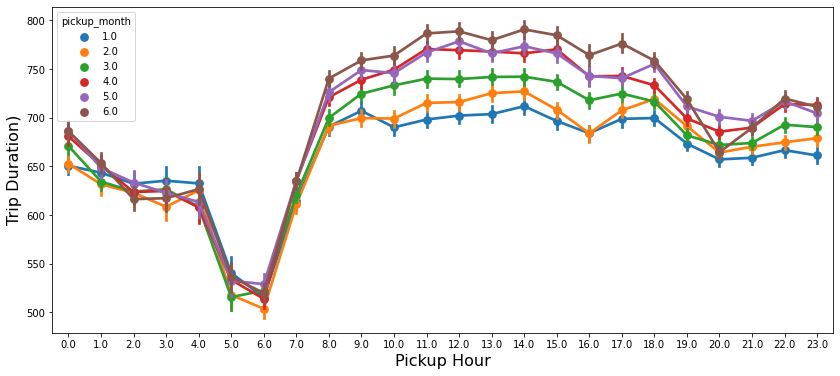

In [ ]:
#Plot showing variation in trip duraion for diffrent pickups for diffrent months 

plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_month')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)

Text(0, 0.5, 'Trip Duration)')

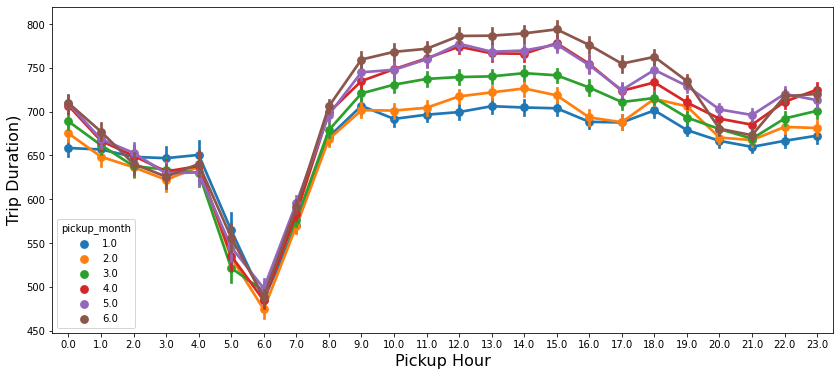

In [ ]:
#Plot showing variation in trip duraion for diffrent dropoffs for diffrent months 

plt.figure(figsize=(14,6))
sns.pointplot(x='dropoff_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_month')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)

Months only affect duration a little bit ; while pickup hours seems may be infulence that more

### Trip Duration vs Pickup/Dropoff hour for diffrent days of the week 




In [ ]:

# Plotting a line graph to represent the change in time duration of trip for diffrent days of the week 

plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_weekday')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)


Text(0, 0.5, 'Trip Duration)')

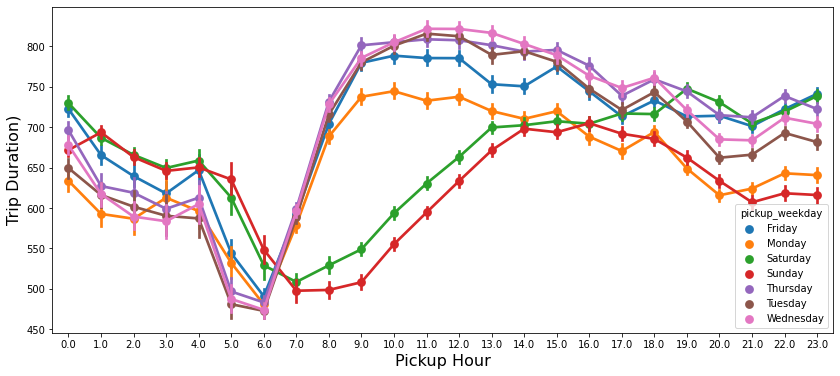

In [ ]:
# Plotting a line graph to represent the change in time duration of trip for diffrent days of the week 

plt.figure(figsize=(14,6))
sns.pointplot(x='dropoff_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_weekday')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)




*   During the moring rush hours from Monday to Friday ie. 7 AM to 10 AM, maybe owing to traffic jam.


* Duration are high duing wokday (Mon.-Fri.)






# Feature Engineering:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273780 entries, 0 to 1354582
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1273780 non-null  object        
 1   vendor_id              1273780 non-null  int64         
 2   pickup_datetime        1273780 non-null  datetime64[ns]
 3   dropoff_datetime       1273780 non-null  datetime64[ns]
 4   passenger_count        1273780 non-null  int64         
 5   pickup_longitude       1273780 non-null  float64       
 6   pickup_latitude        1273780 non-null  float64       
 7   dropoff_longitude      1273780 non-null  float64       
 8   dropoff_latitude       1273780 non-null  float64       
 9   store_and_fwd_flag     1273780 non-null  object        
 10  trip_duration          1273780 non-null  int64         
 11  Distance               1273780 non-null  float64       
 12  haversine_distance     12737

# Check for multicollinearity

Correlation :

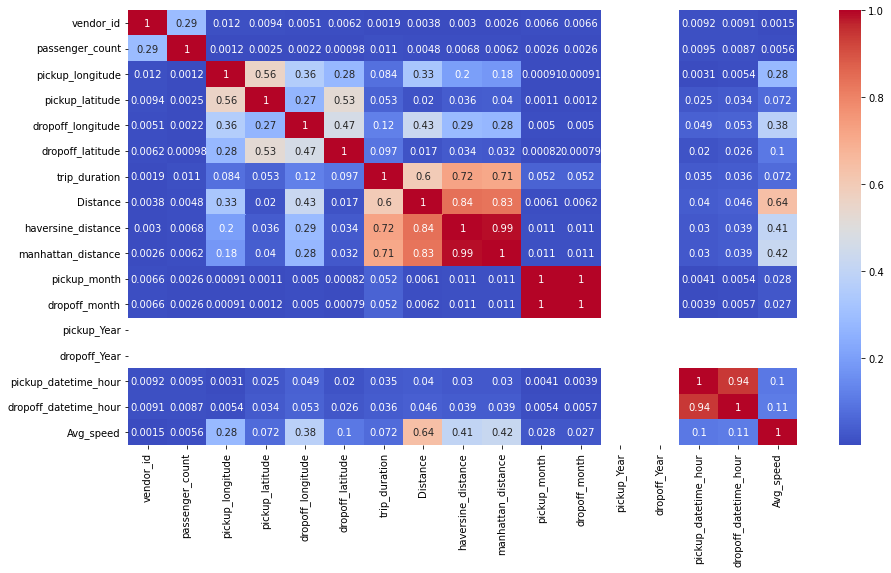

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))


In [ ]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance,haversine_distance,manhattan_distance,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,pickup_month,dropoff_month,Pick_Up_time,Drop_off_time,pickup_Year,dropoff_Year,pickup_datetime_hour,dropoff_datetime_hour,Avg_speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,1.22,0.93,1.08,2016-03-14,2016-03-14,Monday,Monday,3.00,3.00,17:24:55,17:32:30,2016.00,2016.00,17.00,17.00,9.62
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663,1.33,1.12,1.51,2016-06-12,2016-06-12,Sunday,Sunday,6.00,6.00,00:43:35,00:54:38,2016.00,2016.00,0.00,0.00,7.22
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124,2.10,3.97,5.10,2016-01-19,2016-01-19,Tuesday,Tuesday,1.00,1.00,11:35:24,12:10:48,2016.00,2016.00,11.00,12.00,3.55
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429,0.30,0.92,1.03,2016-04-06,2016-04-06,Wednesday,Wednesday,4.00,4.00,19:32:31,19:39:40,2016.00,2016.00,19.00,19.00,2.49
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435,0.20,0.74,0.75,2016-03-26,2016-03-26,Saturday,Saturday,3.00,3.00,13:30:55,13:38:10,2016.00,2016.00,13.00,13.00,1.70


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Distance','haversine_distance','id','vendor_id','dropoff_month','trip_duration','pickup_datetime','dropoff_datetime','pickup_date','dropoff_date','Pick_Up_time','Drop_off_time'	]]])

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,dropoff_datetime_hour,9.07
1,pickup_datetime_hour,9.04
2,pickup_latitude,1.93
3,dropoff_latitude,1.70
4,pickup_longitude,1.69
5,dropoff_longitude,1.61
6,Avg_speed,1.40
7,manhattan_distance,1.29
8,pickup_month,1.00
9,passenger_count,1.00


In [ ]:
df.select_dtypes(include=['object'])

,id,store_and_fwd_flag,pickup_date,dropoff_date,Pick_Up_time,Drop_off_time
0,id2875421,N,2016-03-14,2016-03-14,17:24:55,17:32:30
1,id2377394,N,2016-06-12,2016-06-12,00:43:35,00:54:38
2,id3858529,N,2016-01-19,2016-01-19,11:35:24,12:10:48
3,id3504673,N,2016-04-06,2016-04-06,19:32:31,19:39:40
4,id2181028,N,2016-03-26,2016-03-26,13:30:55,13:38:10
...,...,...,...,...,...,...
1354578,id2376096,N,2016-04-08,2016-04-08,13:31:04,13:44:02
1354579,id1049543,N,2016-01-10,2016-01-10,07:35:15,07:46:10
1354580,id2304944,N,2016-04-22,2016-04-22,06:57:41,07:10:25
1354581,id2714485,N,2016-01-05,2016-01-05,15:56:26,16:02:39


In [ ]:
df.shape

In [ ]:
categorical_col=['pickup_weekday','pickup_datetime_hour']

In [ ]:
df_train=pd.get_dummies(df, columns = categorical_col,drop_first=True)

In [ ]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance,haversine_distance,manhattan_distance,pickup_date,dropoff_date,dropoff_weekday,pickup_month,dropoff_month,Pick_Up_time,Drop_off_time,pickup_Year,dropoff_Year,dropoff_datetime_hour,Avg_speed,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,pickup_datetime_hour_1.0,pickup_datetime_hour_2.0,pickup_datetime_hour_3.0,pickup_datetime_hour_4.0,pickup_datetime_hour_5.0,pickup_datetime_hour_6.0,pickup_datetime_hour_7.0,pickup_datetime_hour_8.0,pickup_datetime_hour_9.0,pickup_datetime_hour_10.0,pickup_datetime_hour_11.0,pickup_datetime_hour_12.0,pickup_datetime_hour_13.0,pickup_datetime_hour_14.0,pickup_datetime_hour_15.0,pickup_datetime_hour_16.0,pickup_datetime_hour_17.0,pickup_datetime_hour_18.0,pickup_datetime_hour_19.0,pickup_datetime_hour_20.0,pickup_datetime_hour_21.0,pickup_datetime_hour_22.0,pickup_datetime_hour_23.0
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,1.22,0.93,1.08,2016-03-14,2016-03-14,Monday,3.00,3.00,17:24:55,17:32:30,2016.00,2016.00,17.00,9.62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663,1.33,1.12,1.51,2016-06-12,2016-06-12,Sunday,6.00,6.00,00:43:35,00:54:38,2016.00,2016.00,0.00,7.22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124,2.10,3.97,5.10,2016-01-19,2016-01-19,Tuesday,1.00,1.00,11:35:24,12:10:48,2016.00,2016.00,12.00,3.55,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429,0.30,0.92,1.03,2016-04-06,2016-04-06,Wednesday,4.00,4.00,19:32:31,19:39:40,2016.00,2016.00,19.00,2.49,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435,0.20,0.74,0.75,2016-03-26,2016-03-26,Saturday,3.00,3.00,13:30:55,13:38:10,2016.00,2016.00,13.00,1.70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.shape

(1273780, 33)

In [ ]:
df_train.drop(['id','vendor_id','pickup_datetime','dropoff_datetime','passenger_count','dropoff_longitude','dropoff_latitude',
               'store_and_fwd_flag','Distance','haversine_distance','pickup_date','dropoff_date','dropoff_weekday','pickup_month','dropoff_month','Pick_Up_time','Drop_off_time',
               'pickup_Year','dropoff_Year','dropoff_datetime_hour','Avg_speed'	],axis=1,inplace=True)

In [ ]:
df_train.shape

(1273780, 33)

In [ ]:
df_train.head()

,pickup_longitude,pickup_latitude,trip_duration,manhattan_distance,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,pickup_datetime_hour_1.0,pickup_datetime_hour_2.0,pickup_datetime_hour_3.0,pickup_datetime_hour_4.0,pickup_datetime_hour_5.0,pickup_datetime_hour_6.0,pickup_datetime_hour_7.0,pickup_datetime_hour_8.0,pickup_datetime_hour_9.0,pickup_datetime_hour_10.0,pickup_datetime_hour_11.0,pickup_datetime_hour_12.0,pickup_datetime_hour_13.0,pickup_datetime_hour_14.0,pickup_datetime_hour_15.0,pickup_datetime_hour_16.0,pickup_datetime_hour_17.0,pickup_datetime_hour_18.0,pickup_datetime_hour_19.0,pickup_datetime_hour_20.0,pickup_datetime_hour_21.0,pickup_datetime_hour_22.0,pickup_datetime_hour_23.0
0,-73.98,40.77,455,1.08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,-73.98,40.74,663,1.51,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-73.98,40.76,2124,5.10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,-74.01,40.72,429,1.03,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-73.97,40.79,435,0.75,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_train

,pickup_longitude,pickup_latitude,trip_duration,manhattan_distance,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,pickup_datetime_hour_1.0,pickup_datetime_hour_2.0,pickup_datetime_hour_3.0,pickup_datetime_hour_4.0,pickup_datetime_hour_5.0,pickup_datetime_hour_6.0,pickup_datetime_hour_7.0,pickup_datetime_hour_8.0,pickup_datetime_hour_9.0,pickup_datetime_hour_10.0,pickup_datetime_hour_11.0,pickup_datetime_hour_12.0,pickup_datetime_hour_13.0,pickup_datetime_hour_14.0,pickup_datetime_hour_15.0,pickup_datetime_hour_16.0,pickup_datetime_hour_17.0,pickup_datetime_hour_18.0,pickup_datetime_hour_19.0,pickup_datetime_hour_20.0,pickup_datetime_hour_21.0,pickup_datetime_hour_22.0,pickup_datetime_hour_23.0
0,-73.98,40.77,455,1.08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,-73.98,40.74,663,1.51,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-73.98,40.76,2124,5.10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,-74.01,40.72,429,1.03,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-73.97,40.79,435,0.75,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273775,-73.98,40.75,778,1.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1273776,-74.00,40.75,655,5.01,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1273777,-73.96,40.77,764,6.61,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1273778,-73.98,40.75,373,0.95,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
from scipy.stats import zscore

In [ ]:
X = df_train.drop('trip_duration',axis=1)
X['manhattan_distance'] = np.log(X['manhattan_distance'])
Y = np.log10(df_train['trip_duration'])


In [ ]:
X

In [ ]:
Y

In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model building**
We will start by building simple prediction models and work our way upto more complex models. but first lets start by defining some important function's. 

In [ ]:
features = [i for i in df.columns if i not in ['trip_duration']]

Defining for model to fit model 

In [ ]:
def fit_mod(model, X_train, X_test, Y_train, Y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''
  global Y_pred
  # Fitting the model
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  a,p = Y_test,Y_pred 

  return Y_pred


Defining Evaluation matrix

In [ ]:
def eva_mat(model, X_train, X_test, y_train, y_test):

  '''Takes regressor model and compute evaluation matrix '''
  global importance
  global indices
  global feature
# Calculating Evaluation Matrix
  mse = mean_squared_error(Y_test,Y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(Y_test,Y_pred)
  try:
    importance = model.feature_importances_
    feature = features
  except:
    importance = np.abs(model.coef_)
    feature = X
  indices = np.argsort(importance)
  indices = indices[::-1]

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mean_absolute_error(Y_test,Y_pred))
  print("Train R2 :", r2_score(y_train**2,model.predict(X_train)**2))
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

  

Plotting actual vs pridicted values graph and Feature importance 

In [ ]:
def plot_model(model, X_train, X_test, y_train, y_test):

# Plotting actual and predicted values and the feature importances:
  plt.figure(figsize=(18,6))
  plt.subplot(2,1,1)
  plt.plot((Y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted trip duration')
  plt.subplot(2,1,2)
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()

  return model

# Linear regression 

In [ ]:
lr = LinearRegression()
fit_mod(lr, X_train, X_test, Y_train, Y_test)

array([3.18567666, 2.96107912, 2.97280124, ..., 3.23578657, 2.49442828,
       2.2598765 ])

In [ ]:
eva_mat(lr, X_train, X_test, Y_train, Y_test)

MSE : 0.02825967923206049
RMSE : 0.16810615465253048
MAE : 0.13217262480678924
Train R2 : 0.6253638595057802
Test R2 : 0.6206967361127435
Adjusted R2 :  0.6206490855101501


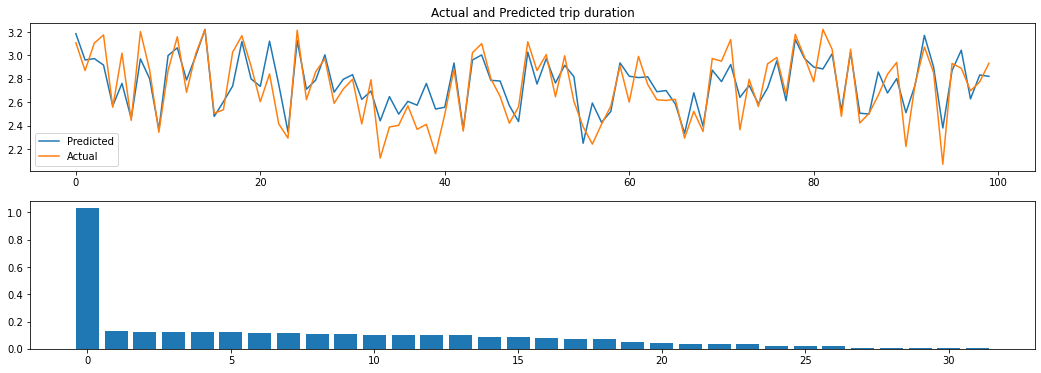

In [ ]:
try:
 plot_model(lr, X_train, X_test, Y_train, Y_test)
except Exception:
    pass

# Decision Tree

In [ ]:
# Minimum number of samples required to split a node:
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [40,50]

# Maximum depth of trees:
max_depth = [6,8,10]

In [ ]:
# Regressor
regressor = DecisionTreeRegressor(random_state=1)


# HYperparameter Grid
grid = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
dt = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
dt.fit(X_train, Y_train)

# Analysing the model with best set of parametes
fit_mod(dt.best_estimator_, X_train, X_test, Y_train, Y_test)

eva_mat(dt.best_estimator_ , X_train, X_test, Y_train, Y_test)

MSE : 0.02962621311468974
RMSE : 0.1721226687995795
MAE : 0.13575170977218914
Train R2 : 0.6080032036887041
Test R2 : 0.6023550289179302
Adjusted R2 :  0.6023050741079028


In [ ]:
print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")

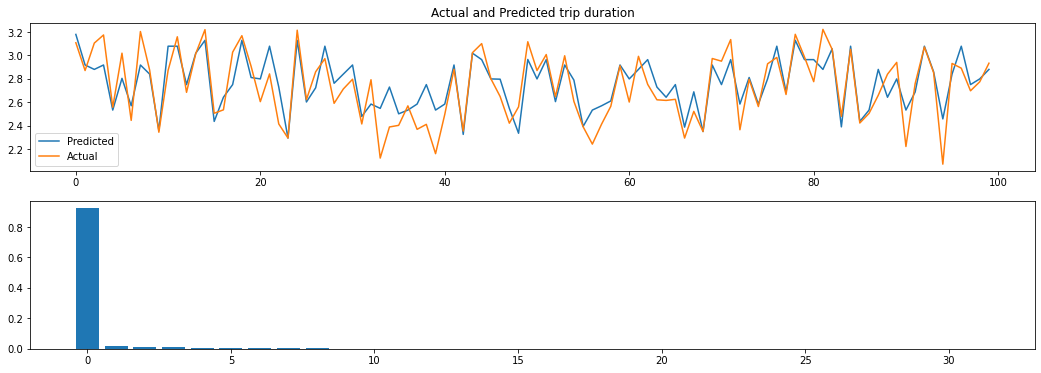

In [ ]:
try:
 plot_model(dt.best_estimator_, X_train, X_test, Y_train, Y_test)
except Exception:
    pass

# Random Forest 

In [ ]:
# Providing the range of values for hyperparameters such as Number of trees:
n_estimators = [50,100,150]

In [ ]:
# Regressor
regressor = RandomForestRegressor(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
rf = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
rf.fit(X_train, Y_train)

# Analysing the model with best set of parametes
fit_mod(rf.best_estimator_, X_train, X_test, Y_train, Y_test)

eva_mat(rf.best_estimator_ , X_train, X_test, Y_train, Y_test)

In [ ]:
try:
 plot_model(dt.best_estimator_, X_train, X_test, Y_train, Y_test)
except Exception:
    pass

# XG boost

In [ ]:
# Learning rate:
eta = [0.05,0.08,0.1]

In [ ]:
# Regressor
regressor = XGBRegressor(silent=True, random_state=3)

# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf,
        'eta' : eta}

# GridSearch to find the best parameters
xgb = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
xgb.fit(X_train, Y_train)

# Analysing the model with best set of parametes
fit_mod(xgb.best_estimator_, X_train, X_test, Y_train, Y_test)

eva_mat(xgb.best_estimator_ , X_train, X_test, Y_train, Y_test)

In [ ]:
try:
 plot_model(rf.best_estimator_, X_train, X_test, Y_train, Y_test)
except Exception:
    pass

# GradientBoost 

In [ ]:
# Regressor
regressor = GradientBoostingRegressor(random_state=4)

# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
gbr = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
gbr.fit(X_train, Y_train)

# Analysing the model with best set of parametes
fit_mod(gbr.best_estimator_, X_train, X_test, Y_train, Y_test)

eva_mat(gbr.best_estimator_ , X_train, X_test, Y_train, Y_test)

In [ ]:
try:
 plot_model(dt.best_estimator_, X_train, X_test, Y_train, Y_test)
except Exception:
    pass

# Smriti

In [ ]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predicting the Train set results

Y_pred_train = regressor.predict(X_train)

In [ ]:
Y_pred_train

array([2.70033931, 2.6407037 , 2.7532485 , ..., 2.78279335, 2.85033518,
       2.78805971])

In [ ]:
# Predicting the Test set results

Y_pred_test = regressor.predict(X_test)

In [ ]:
Y_pred_test

array([3.18567666, 2.96107912, 2.97280124, ..., 3.23578657, 2.49442828,
       2.2598765 ])

In [ ]:
# r2 score of train set
from sklearn.metrics import r2_score
r2_linear_train = r2_score(Y_train, Y_pred_train)

In [ ]:
r2_linear_train

0.6219530162410725

In [ ]:
r2_linear_test = r2_score(Y_test, Y_pred_test)

In [ ]:
r2_linear_test

0.6206967361127435

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(Y_test,Y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(Y_test,Y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.02825967923206049
RMSE : 0.16810615465253048
R2 : 0.6206967361127435
Adjusted R2 :  0.6206490855101501


#lasso regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}    # [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
Y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
Y_pred_lasso

In [ ]:
MSE  = mean_squared_error(Y_test,Y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_lasso_test = r2_score(Y_test,Y_pred_lasso)
print("R2 :" ,r2_lasso_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))